# リッジ回帰に対する確率的勾配降下法
目的：　　　　人工データに対し，リッジ回帰を確率的勾配降下法で学習．

搭載機能：
- 学習・予測
- ハイパーパラメータ設定
- パラメータの保存・読込
- 訓練損失の学習曲線を描画

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
# RMSEを計算
def RMSE( lm, X, y ):
    y_pred = lm.predict(X)
    return np.sqrt( 「データごとに二乗誤差を合計するコードを書いてください」 / n ) 

In [3]:
# 二乗損失の損失値と微分を計算
# 損失をクラス化しておくことで，他の損失に取り替えやすくなる
class SquaredLoss():
    def value( self, y_pred, y ):
        n = y.shape[0]
        return 「データごとに二乗誤差を合計するコードを書いてください」
    
    def grad( self, y_pred, y ):
        return -(y-y_pred)

In [4]:
class SGD():
    # 各種初期化
    def __init__( self, loss, reg_coeff=1e-6, t0=1.0e+3, eta=1.0e+2, p=1 ):
        self.__t0 = t0
        self.__eta = eta
        self.__t = 0
        self.__w = None
        self.__b = 0
        self.__p = p
        self.__loss = loss
        self.__lambda = reg_coeff
        self.__epoch = 100
        
    def set_eta( self, eta ):
        self.__eta = eta
        
    # パラメータを保存
    def save_param( self, fname ):
        if self.__w is None:
            return
        fw = open(fname,'wb')
        pickle.dump( [self.__w, self.__b], fw )
        fw.close()       
        
    # パラメータを読込
    def load_param( self, fname ):
        f = open(fname,'rb')
        [ self.__w, self.__b ] = pickle.load(f)
        print( self.__w )
        f.close() 

    # 反復数をインクリメント
    def increment_counter( self ):
        self.__t += 1

    # 学習率を計算
    def learning_rate( self ):
        return self.__eta/np.power( (self.__t0+self.__t), self.__p )
    
    # 各種状態をリセット
    def reset( self ):
        self.__t = 0
        self.__w *= 0
        self.__b = 0
    
    # 予測値を計算
    def predict( self, X ):
        if self.__w is None:
            return
        return np.dot( X, self.__w.T ) + self.__b
    
    # 訓練損失をプロット
    def plot( self, loss_curve ):
        n = len(loss_curve)
        e = np.arange(n)
        plt.title('Train: Loss curve'), plt.xlabel('epoch'), plt.ylabel('loss')
        plt.plot(e, loss_curve)

    # 学習を実行
    def fit( self, X, y):
        if self.__w is None:
            self.__w = np.zeros( X.shape[1] )
        loss_curve = []
        n = 「訓練データXのレコード数をnumpy.shapeを用いて表してください」
        for e in range(self.__epoch):
            ind = list(range(n))
            「リストindをシャッフルする処理を書いてください」
            for i in ind:
                y_pred = np.dot(X[i], self.__w.T) + self.__b
                grad_coeff = self.__loss.grad(y_pred, y[i])
                self.__w -= self.learning_rate() * ( grad_coeff * X[i] + self.__lambda  * w )
                self.__b -= self.learning_rate() * grad_coeff
            loss_curve.append( self.__loss.value( self.predict(X), y ) )
            self.increment_counter()
        self.plot( loss_curve )

In [5]:
w = np.array( [1,2] )
b = 1
sigma = 1
n = 10
d = 2
X = np.random.uniform( -1, 1, (n,d) )
y = np.dot(X,w.T) + np.random.normal(0,sigma,n).T

In [6]:
lm = SGD( SquaredLoss(), eta=1e+2 )

RMSE: 0.73


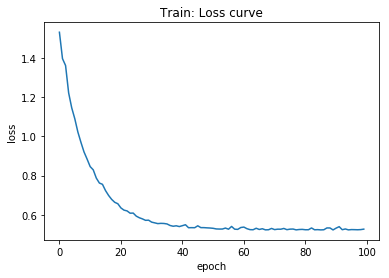

In [7]:
#動作確認をしてみましょう。
lm.fit(X,y)
y_pred = lm.predict(X)
print( "RMSE: {:.2}".format( RMSE(lm,X,y) ) )

RMSE: 0.54


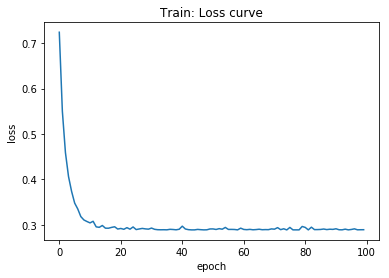

In [9]:
#動作確認をしてみましょう。
lm.reset()
lm.fit(X,y)
print( "RMSE: {:.2}".format( RMSE(lm,X,y) ) )

In [10]:
#動作確認をしてみましょう。
lm.save_param( "param.bin")
lm.reset()
print( "RMSE: {:.2}".format( RMSE(lm,X,y) ) )
lm.load_param("param.bin")
print( "RMSE: {:.2}".format( RMSE(lm,X,y) ) )

RMSE: 1.1
[0.80954589 1.65046649]
RMSE: 0.54
